In [1]:
import pandas as pd
import numpy as np

In [2]:
# from PIL import Image
# import os
# import pandas as pd
# i = 0

# # Function to divide an image into 64 parts and represent it as greyscale values
# def process_image(image_path):
#     image = Image.open(image_path).convert('L')  # Convert to greyscale
#     width, height = image.size
#     image_parts = []

#     # Divide the image into 8x8 grid
#     for i in range(8):
#         for j in range(8):
#             left = j * (width // 8)
#             upper = i * (height // 8)
#             right = (j + 1) * (width // 8)
#             lower = (i + 1) * (height // 8)

#             # Crop each part
#             part = image.crop((left, upper, right, lower))
#             # Get the mean greyscale value of the part
#             mean_value = np.array(part.getdata()).mean()
#             image_parts.append(mean_value)

#     return image_parts

# # Folder containing cat and dog images
# folder_path = "C:/Users/sagni/Documents/Personal Files/CS7641/dogs-vs-cats"

# # List to store data for tabular representation
# data = []

# # Iterate through files in the folder
# for filename in os.listdir(folder_path):
#     if filename.endswith(".jpg") or filename.endswith(".png"):
#         print(i)
#         i += 1
#         image_path = os.path.join(folder_path, filename)
#         label = "cat" if "cat" in filename else "dog"

#         # Process image and get greyscale values
#         image_parts = process_image(image_path)

#         # Append data to the list
#         data.append([label] + image_parts)

# # Create a pandas DataFrame
# columns = ["Label"] + [f"Pixel_{i}" for i in range(64)]
# df = pd.DataFrame(data, columns=columns)

In [3]:
# df.to_csv("C:/Users/sagni/Documents/Personal Files/CS7641/dogs-vs-cats/File.csv", index=False)

In [4]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [5]:
#import file from C:\Users\sagni\Documents\Personal Files\CS7641\CS7641\Data\Cat vs Dog
data = pd.read_csv("C:/Users/sagni/Documents/Personal Files/CS7641/dogs-vs-cats/File.csv")

In [33]:
%run Source_Be_With_Me.ipynb
eda(data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 532 to 9070
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pixel_0   15000 non-null  float64
 1   Pixel_1   15000 non-null  float64
 2   Pixel_2   15000 non-null  float64
 3   Pixel_3   15000 non-null  float64
 4   Pixel_4   15000 non-null  float64
 5   Pixel_5   15000 non-null  float64
 6   Pixel_6   15000 non-null  float64
 7   Pixel_7   15000 non-null  float64
 8   Pixel_8   15000 non-null  float64
 9   Pixel_9   15000 non-null  float64
 10  Pixel_10  15000 non-null  float64
 11  Pixel_11  15000 non-null  float64
 12  Pixel_12  15000 non-null  float64
 13  Pixel_13  15000 non-null  float64
 14  Pixel_14  15000 non-null  float64
 15  Pixel_15  15000 non-null  float64
 16  Pixel_16  15000 non-null  float64
 17  Pixel_17  15000 non-null  float64
 18  Pixel_18  15000 non-null  float64
 19  Pixel_19  15000 non-null  float64
 20  Pixel_20  15000 non-null  f

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,Pixel_11,Pixel_12,Pixel_13,Pixel_14,Pixel_15,Pixel_16,Pixel_17,Pixel_18,Pixel_19,Pixel_20,Pixel_21,Pixel_22,Pixel_23,Pixel_24,Pixel_25,Pixel_26,Pixel_27,Pixel_28,Pixel_29,Pixel_30,Pixel_31,Pixel_32,Pixel_33,Pixel_34,Pixel_35,Pixel_36,Pixel_37,Pixel_38,Pixel_39,Pixel_40,Pixel_41,Pixel_42,Pixel_43,Pixel_44,Pixel_45,Pixel_46,Pixel_47,Pixel_48,Pixel_49,Pixel_50,Pixel_51,Pixel_52,Pixel_53,Pixel_54,Pixel_55,Pixel_56,Pixel_57,Pixel_58,Pixel_59,Pixel_60,Pixel_61,Pixel_62,Pixel_63,Label
532,22.37,25.50,45.53,72.59,97.48,87.44,106.96,143.00,9.73,9.77,14.57,46.38,43.93,52.81,102.18,123.87,11.72,19.17,34.47,71.83,78.58,33.04,93.40,120.11,28.87,46.25,70.92,86.23,75.65,45.32,81.82,116.30,35.60,55.51,83.60,79.31,85.77,54.56,53.90,116.28,29.31,36.17,69.85,102.46,92.62,55.56,40.51,112.90,23.74,14.14,57.88,128.25,124.33,71.15,39.42,110.06,16.68,10.73,60.54,165.14,60.11,98.21,55.06,108.68,1
1161,75.13,72.41,67.24,34.52,26.56,24.85,54.55,76.84,56.50,63.47,87.25,49.49,31.24,106.68,177.38,173.68,80.51,77.20,45.17,44.67,55.43,191.88,182.23,180.50,166.38,113.73,29.96,44.37,28.64,179.95,175.91,168.14,159.60,77.18,22.21,28.74,20.87,72.93,102.34,169.77,166.86,45.59,10.46,21.16,15.56,12.58,24.81,112.58,165.76,62.47,17.11,16.75,12.43,14.96,24.33,32.59,167.99,170.54,41.40,24.86,14.87,14.76,84.83,39.65,1
8848,81.34,86.07,85.02,101.47,85.38,148.40,110.97,72.93,71.42,89.94,185.56,243.34,197.60,187.82,88.09,78.06,69.05,89.53,197.20,233.48,233.59,223.88,126.45,82.62,74.73,132.44,208.75,220.91,208.71,191.71,89.00,78.76,67.71,162.76,195.37,199.51,194.93,162.79,75.91,75.88,67.27,164.03,192.53,202.67,188.71,155.44,62.19,48.93,67.73,169.26,172.30,166.47,163.22,157.66,75.44,62.50,63.60,163.90,141.46,121.69,118.16,161.77,93.82,91.08,1
23531,209.48,210.88,131.83,144.40,172.67,173.96,204.32,195.04,171.56,160.57,135.55,139.10,105.39,109.71,165.11,179.77,168.65,130.50,118.78,103.17,95.04,97.94,112.92,128.01,193.32,163.66,141.74,129.26,120.14,85.39,86.97,153.35,191.55,175.99,139.21,64.97,77.10,98.44,135.05,154.53,159.23,155.07,128.94,105.24,113.73,91.85,141.43,155.02,138.23,157.49,117.51,142.29,126.04,133.92,170.63,165.23,148.90,147.49,141.30,145.73,126.04,129.56,154.38,159.34,0
11358,220.42,176.89,177.01,180.30,175.51,46.27,32.04,33.02,198.22,139.11,148.86,181.91,84.40,33.60,35.56,27.26,181.69,133.21,66.52,39.82,22.09,30.86,46.09,44.97,186.30,145.97,24.54,35.40,28.05,101.98,180.03,121.04,140.24,45.33,24.39,38.01,36.53,65.66,243.96,246.79,127.64,69.49,44.49,40.41,69.68,176.31,246.61,234.25,192.71,183.15,175.76,176.82,188.15,77.67,168.84,236.10,205.92,205.68,205.39,211.81,207.90,183.09,203.78,214.31,1




EDA Statistics


,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,Pixel_11,Pixel_12,Pixel_13,Pixel_14,Pixel_15,Pixel_16,Pixel_17,Pixel_18,Pixel_19,Pixel_20,Pixel_21,Pixel_22,Pixel_23,Pixel_24,Pixel_25,Pixel_26,Pixel_27,Pixel_28,Pixel_29,Pixel_30,Pixel_31,Pixel_32,Pixel_33,Pixel_34,Pixel_35,Pixel_36,Pixel_37,Pixel_38,Pixel_39,Pixel_40,Pixel_41,Pixel_42,Pixel_43,Pixel_44,Pixel_45,Pixel_46,Pixel_47,Pixel_48,Pixel_49,Pixel_50,Pixel_51,Pixel_52,Pixel_53,Pixel_54,Pixel_55,Pixel_56,Pixel_57,Pixel_58,Pixel_59,Pixel_60,Pixel_61,Pixel_62,Pixel_63,Label
count,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.0
mean,115.99,117.97,119.19,119.92,119.94,119.91,118.80,116.82,116.06,114.11,113.17,113.88,114.22,114.42,115.15,116.45,114.72,111.39,109.64,110.90,111.32,111.25,112.89,115.28,114.38,111.44,111.27,113.64,114.38,112.60,112.66,114.60,114.84,112.96,115.22,119.03,119.20,116.26,114.13,115.17,116.23,114.83,117.40,120.61,121.02,118.42,116.40,116.84,118.40,118.41,119.98,122.39,122.72,121.10,119.92,119.46,121.18,123.87,125.82,127.81,127.96,127.01,124.99,122.53,0.5
std,61.19,58.63,56.87,56.08,56.17,56.96,58.87,61.41,58.39,53.95,51.53,51.27,51.20,51.88,54.36,58.27,56.18,51.53,50.15,50.46,50.47,50.73,52.34,56.15,55.34,51.16,51.11,53.13,53.59,51.62,51.70,55.37,55.04,51.05,51.88,54.59,54.47,51.99,51.47,54.54,55.04,51.60,51.32,52.59,52.74,51.47,51.61,54.30,55.93,52.74,51.26,51.16,51.32,51.63,52.83,55.44,57.94,55.63,53.67,52.87,53.05,53.74,55.08,57.30,0.5
min,0.98,0.98,1.00,0.99,1.00,0.98,1.00,0.99,0.99,0.97,1.03,1.03,1.00,1.00,0.96,0.95,0.99,0.98,1.00,0.99,1.00,0.99,1.00,0.99,1.00,1.00,0.99,0.99,0.99,0.98,1.00,0.97,1.00,0.99,0.98,1.00,0.96,0.97,1.00,1.00,0.96,1.00,1.00,1.00,1.02,1.00,1.01,1.00,1.00,1.08,1.58,1.17,1.72,1.07,1.24,1.00,0.98,1.00,1.00,1.00,1.00,0.96,0.99,0.98,0.0
25%,67.82,72.12,75.96,76.78,76.78,76.75,73.16,68.55,70.73,73.68,73.98,74.47,75.42,74.92,74.41,71.95,71.95,72.58,71.68,72.24,73.11,72.54,73.21,72.53,72.18,73.26,72.51,72.66,73.43,72.54,73.06,72.63,72.96,75.06,76.13,77.88,77.31,76.92,75.02,73.93,74.61,76.91,80.01,82.31,82.30,80.70,78.09,76.01,77.01,79.04,83.03,86.09,86.02,83.98,81.40,78.31,78.15,82.93,86.75,90.11,89.91,87.68,84.41,79.73,0.0
50%,112.78,115.02,117.05,118.20,117.78,117.83,115.96,113.13,113.39,111.87,110.67,111.24,111.70,111.72,111.79,113.58,112.04,108.86,107.85,109.02,108.91,109.47,110.22,111.95,111.67,109.68,109.98,112.34,112.72,111.14,110.72,111.62,112.55,111.24,114.85,119.64,119.42,116.05,113.31,113.14,113.97,113.57,117.22,122.11,121.33,118.54,115.31,115.19,115.93,117.33,119.69,121.96,122.26,120.22,118.69,117.54,119.22,122.60,124.50,126.35,126.98,125.86,123.60,120.88,0.5
75%,159.63,159.79,159.09,159.37,158.92,160.15,160.26,160.50,156.96,151.19,148.90,149.39,149.73,150.08,152.51,156.99,153.54,146.52,144.27,145.95,146.31,146.33,149.06,154.09,153.01,146.35,146.54,151.39,152.39,149.20,148.73,152.43,152.47,148.23,151.82,158.32,158.51,153.46,150.07,152.98,153.82,149.93,152.49,157.17,158.94,154.44,152.45,154.39,156.29,154.35,155.81,157.81,158.17,157.06,156.68,157.55,161.54,163.06,163.09,165.05,165.75,164.81,163.52,162.69,1.0
max,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,254.86,254.99,254.95,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,25



Missing values


Series([], dtype: int64)



Count of Outliers


Series([], dtype: int64)

In [7]:
#if label = cat then 1 else o for the data frame name data
data['Label'] = data['Label'].map({'cat': 1, 'dog': 0})

In [8]:
c = data['Label'].value_counts(normalize=False)
p = data['Label'].value_counts(normalize=True)*100
display(pd.concat([c,p], axis=1, keys=['counts', '%']))

,counts,%
1,12500,50.0
0,12500,50.0


In [9]:
trainX, trainY, testX, testY = stratified_sampling(data, 'Label', 0.6, 903949505)

Original distribution


,counts,%
1,12500,50.0
0,12500,50.0




Train distribution


,counts,%
1,5000,50.0
0,5000,50.0




Test distribution


,counts,%
1,7500,50.0
0,7500,50.0




Train_x shape
Number of columns are 10000 and number of rows are 64


,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,Pixel_11,Pixel_12,Pixel_13,Pixel_14,Pixel_15,Pixel_16,Pixel_17,Pixel_18,Pixel_19,Pixel_20,Pixel_21,Pixel_22,Pixel_23,Pixel_24,Pixel_25,Pixel_26,Pixel_27,Pixel_28,Pixel_29,Pixel_30,Pixel_31,Pixel_32,Pixel_33,Pixel_34,Pixel_35,Pixel_36,Pixel_37,Pixel_38,Pixel_39,Pixel_40,Pixel_41,Pixel_42,Pixel_43,Pixel_44,Pixel_45,Pixel_46,Pixel_47,Pixel_48,Pixel_49,Pixel_50,Pixel_51,Pixel_52,Pixel_53,Pixel_54,Pixel_55,Pixel_56,Pixel_57,Pixel_58,Pixel_59,Pixel_60,Pixel_61,Pixel_62,Pixel_63
23628,33.32,41.54,19.13,25.38,22.57,31.57,36.58,35.66,38.39,17.77,2.50,2.17,3.86,7.61,32.47,35.13,69.19,10.44,4.62,8.14,6.21,3.83,8.47,8.57,54.52,5.76,5.80,8.37,3.54,8.08,6.14,6.20,19.70,3.63,22.82,99.94,49.76,11.62,2.76,2.75,55.77,8.34,181.10,209.07,181.18,22.30,8.45,2.80,235.89,44.88,93.72,123.06,73.65,15.30,16.61,86.56,239.92,82.15,43.27,114.83,116.54,108.00,169.00,240.05
1781,71.49,41.76,29.49,29.35,127.88,67.25,34.23,33.84,26.13,38.99,105.58,118.57,142.07,130.19,125.43,40.84,25.73,115.95,229.17,242.97,236.77,211.05,180.15,51.72,37.80,164.56,247.93,248.00,208.56,60.22,68.64,63.18,31.33,151.74,245.67,247.47,197.12,72.31,63.20,77.38,25.80,109.60,235.44,236.43,154.40,79.40,67.15,71.56,32.78,91.55,238.51,218.88,228.04,168.91,75.47,74.30,48.61,101.38,183.05,168.11,159.22,118.90,85.26,98.57
22823,103.26,92.45,110.30,87.01,76.65,78.96,83.41,105.46,103.91,96.66,47.92,47.53,50.46,45.39,48.16,90.66,149.64,94.85,30.58,45.34,52.92,25.21,47.85,75.09,145.72,139.08,63.61,83.26,123.26,46.07,117.50,121.54,142.72,141.93,85.37,93.73,136.13,39.49,123.72,130.24,137.62,133.68,50.82,35.16,46.68,77.15,68.88,131.74,54.64,37.04,13.89,27.86,32.37,32.00,33.36,143.35,141.21,36.33,11.80,15.16,7.70,7.80,44.20,157.52
15441,141.94,126.13,72.96,73.04,35.82,83.59,55.78,22.57,140.94,110.36,93.37,193.51,81.80,184.31,235.01,79.79,76.36,70.33,89.08,116.74,157.43,237.36,248.05,108.01,94.48,70.61,76.81,134.94,145.34,199.53,238.14,109.61,57.86,78.81,161.67,107.17,173.36,155.63,178.40,98.79,71.31,100.42,33.80,148.08,134.85,82.62,84.31,66.70,181.34,44.87,47.33,198.54,64.13,74.06,87.45,65.19,209.10,168.04,146.95,128.44,90.69,89.45,124.00,75.37
13272,119.12,102.00,104.78,113.80,137.19,125.69,138.22,149.18,105.15,102.38,108.05,123.46,155.66,139.76,149.54,154.58,120.14,125.37,129.68,130.18,146.00,143.41,127.27,163.57,191.39,188.04,181.70,163.54,135.93,123.60,127.63,152.09,223.75,227.22,226.99,209.87,149.68,115.56,126.68,208.64,216.36,224.13,227.73,187.44,141.60,111.11,142.31,224.14,208.42,207.68,211.42,213.92,166.37,121.40,141.81,216.84,250.72,250.38,244.35,238.94,188.41,132.93,152.12,209.35




Train_y shape
Number of columns are 10000 and number of rows are 1


,Label
23628,0
1781,1
22823,0
15441,0
13272,0




Train_x shape
Number of columns are 15000 and number of rows are 64


,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,Pixel_11,Pixel_12,Pixel_13,Pixel_14,Pixel_15,Pixel_16,Pixel_17,Pixel_18,Pixel_19,Pixel_20,Pixel_21,Pixel_22,Pixel_23,Pixel_24,Pixel_25,Pixel_26,Pixel_27,Pixel_28,Pixel_29,Pixel_30,Pixel_31,Pixel_32,Pixel_33,Pixel_34,Pixel_35,Pixel_36,Pixel_37,Pixel_38,Pixel_39,Pixel_40,Pixel_41,Pixel_42,Pixel_43,Pixel_44,Pixel_45,Pixel_46,Pixel_47,Pixel_48,Pixel_49,Pixel_50,Pixel_51,Pixel_52,Pixel_53,Pixel_54,Pixel_55,Pixel_56,Pixel_57,Pixel_58,Pixel_59,Pixel_60,Pixel_61,Pixel_62,Pixel_63
532,22.37,25.50,45.53,72.59,97.48,87.44,106.96,143.00,9.73,9.77,14.57,46.38,43.93,52.81,102.18,123.87,11.72,19.17,34.47,71.83,78.58,33.04,93.40,120.11,28.87,46.25,70.92,86.23,75.65,45.32,81.82,116.30,35.60,55.51,83.60,79.31,85.77,54.56,53.90,116.28,29.31,36.17,69.85,102.46,92.62,55.56,40.51,112.90,23.74,14.14,57.88,128.25,124.33,71.15,39.42,110.06,16.68,10.73,60.54,165.14,60.11,98.21,55.06,108.68
1161,75.13,72.41,67.24,34.52,26.56,24.85,54.55,76.84,56.50,63.47,87.25,49.49,31.24,106.68,177.38,173.68,80.51,77.20,45.17,44.67,55.43,191.88,182.23,180.50,166.38,113.73,29.96,44.37,28.64,179.95,175.91,168.14,159.60,77.18,22.21,28.74,20.87,72.93,102.34,169.77,166.86,45.59,10.46,21.16,15.56,12.58,24.81,112.58,165.76,62.47,17.11,16.75,12.43,14.96,24.33,32.59,167.99,170.54,41.40,24.86,14.87,14.76,84.83,39.65
8848,81.34,86.07,85.02,101.47,85.38,148.40,110.97,72.93,71.42,89.94,185.56,243.34,197.60,187.82,88.09,78.06,69.05,89.53,197.20,233.48,233.59,223.88,126.45,82.62,74.73,132.44,208.75,220.91,208.71,191.71,89.00,78.76,67.71,162.76,195.37,199.51,194.93,162.79,75.91,75.88,67.27,164.03,192.53,202.67,188.71,155.44,62.19,48.93,67.73,169.26,172.30,166.47,163.22,157.66,75.44,62.50,63.60,163.90,141.46,121.69,118.16,161.77,93.82,91.08
23531,209.48,210.88,131.83,144.40,172.67,173.96,204.32,195.04,171.56,160.57,135.55,139.10,105.39,109.71,165.11,179.77,168.65,130.50,118.78,103.17,95.04,97.94,112.92,128.01,193.32,163.66,141.74,129.26,120.14,85.39,86.97,153.35,191.55,175.99,139.21,64.97,77.10,98.44,135.05,154.53,159.23,155.07,128.94,105.24,113.73,91.85,141.43,155.02,138.23,157.49,117.51,142.29,126.04,133.92,170.63,165.23,148.90,147.49,141.30,145.73,126.04,129.56,154.38,159.34
11358,220.42,176.89,177.01,180.30,175.51,46.27,32.04,33.02,198.22,139.11,148.86,181.91,84.40,33.60,35.56,27.26,181.69,133.21,66.52,39.82,22.09,30.86,46.09,44.97,186.30,145.97,24.54,35.40,28.05,101.98,180.03,121.04,140.24,45.33,24.39,38.01,36.53,65.66,243.96,246.79,127.64,69.49,44.49,40.41,69.68,176.31,246.61,234.25,192.71,183.15,175.76,176.82,188.15,77.67,168.84,236.10,205.92,205.68,205.39,211.81,207.90,183.09,203.78,214.31




Train_y shape
Number of columns are 15000 and number of rows are 1


,Label
532,1
1161,1
8848,1
23531,0
11358,1


In [10]:
del data

In [11]:
# join testX and testY on index to create a daframe data
data = pd.concat([testX, testY], axis=1)
testX, testY, ignoreX, ignoreY = stratified_sampling(data, 'Label', 0.4, 903949505)
#delete pandas dataframe ignoreX, ignoreY
del ignoreX
del ignoreY

Original distribution


,counts,%
1,7500,50.0
0,7500,50.0




Train distribution


,counts,%
1,4500,50.0
0,4500,50.0




Test distribution


,counts,%
1,3000,50.0
0,3000,50.0




Train_x shape
Number of columns are 9000 and number of rows are 64


,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,Pixel_11,Pixel_12,Pixel_13,Pixel_14,Pixel_15,Pixel_16,Pixel_17,Pixel_18,Pixel_19,Pixel_20,Pixel_21,Pixel_22,Pixel_23,Pixel_24,Pixel_25,Pixel_26,Pixel_27,Pixel_28,Pixel_29,Pixel_30,Pixel_31,Pixel_32,Pixel_33,Pixel_34,Pixel_35,Pixel_36,Pixel_37,Pixel_38,Pixel_39,Pixel_40,Pixel_41,Pixel_42,Pixel_43,Pixel_44,Pixel_45,Pixel_46,Pixel_47,Pixel_48,Pixel_49,Pixel_50,Pixel_51,Pixel_52,Pixel_53,Pixel_54,Pixel_55,Pixel_56,Pixel_57,Pixel_58,Pixel_59,Pixel_60,Pixel_61,Pixel_62,Pixel_63
5383,25.02,40.38,50.88,60.69,55.47,43.88,34.07,25.29,53.52,78.70,70.73,68.99,76.92,43.32,63.85,48.45,90.62,88.09,116.22,134.33,168.12,104.41,115.13,92.92,82.16,94.40,166.11,199.83,99.41,200.74,203.10,178.26,131.29,165.21,181.48,210.31,155.10,210.29,167.19,122.08,162.13,187.62,202.43,231.71,220.87,229.62,128.31,53.18,110.60,145.15,197.84,228.12,215.13,200.42,98.95,60.60,103.85,109.10,123.78,144.01,136.50,125.18,110.11,101.08
19374,168.42,208.19,238.89,231.23,206.17,131.44,121.65,92.69,113.70,134.53,129.58,81.98,128.87,145.20,168.04,142.60,222.19,167.86,136.59,90.90,39.28,125.51,207.38,138.01,224.22,83.87,35.90,48.45,48.12,174.40,216.43,177.81,246.72,94.63,48.55,59.08,118.25,227.33,237.50,187.97,238.15,92.09,203.52,148.71,201.43,253.75,253.34,180.81,191.27,141.08,164.53,151.98,196.77,229.14,238.46,167.56,105.16,105.22,142.45,129.69,135.37,168.82,175.96,168.66
22621,155.36,135.05,91.36,75.22,118.77,126.95,83.29,87.08,155.88,112.21,97.85,24.95,24.60,56.88,66.25,132.37,161.93,85.34,93.53,15.79,5.78,52.29,65.51,45.72,181.65,146.62,120.57,63.86,47.63,71.14,37.87,37.56,176.19,166.06,136.14,124.08,99.39,25.37,24.25,27.55,171.18,201.79,158.70,150.29,66.41,3.21,4.05,12.90,147.70,216.96,133.70,92.21,44.02,13.31,4.62,34.72,127.08,164.73,174.19,142.98,35.25,20.41,19.44,10.71
20308,106.07,116.00,113.30,108.08,124.01,142.63,148.19,132.42,72.18,102.28,141.56,157.48,114.04,122.77,160.55,141.16,110.00,73.62,129.79,123.93,112.58,109.94,112.50,127.73,119.40,106.53,123.90,145.60,151.08,139.26,99.77,106.23,114.06,119.92,116.37,163.29,167.03,160.51,102.45,95.00,132.06,156.24,120.00,120.42,87.31,91.35,127.58,116.23,148.79,177.82,166.78,172.77,181.41,181.17,132.99,162.97,124.03,166.52,169.44,169.37,165.18,150.11,127.24,135.39
9531,102.53,168.46,145.05,80.16,72.48,79.50,82.80,82.98,99.00,194.17,131.04,86.38,93.64,100.46,90.60,80.46,96.03,109.45,80.24,117.93,170.79,116.28,82.32,75.48,83.70,67.60,132.56,144.24,179.29,152.63,102.17,77.80,67.24,74.14,147.08,224.44,220.46,202.19,81.91,78.45,69.01,74.41,88.51,153.35,171.37,112.11,70.24,70.85,69.21,71.99,84.59,135.51,78.78,75.80,88.43,73.29,69.81,78.63,119.25,85.58,68.29,100.52,89.90,83.91




Train_y shape
Number of columns are 9000 and number of rows are 1


,Label
5383,1
19374,0
22621,0
20308,0
9531,1




Train_x shape
Number of columns are 6000 and number of rows are 64


,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,Pixel_11,Pixel_12,Pixel_13,Pixel_14,Pixel_15,Pixel_16,Pixel_17,Pixel_18,Pixel_19,Pixel_20,Pixel_21,Pixel_22,Pixel_23,Pixel_24,Pixel_25,Pixel_26,Pixel_27,Pixel_28,Pixel_29,Pixel_30,Pixel_31,Pixel_32,Pixel_33,Pixel_34,Pixel_35,Pixel_36,Pixel_37,Pixel_38,Pixel_39,Pixel_40,Pixel_41,Pixel_42,Pixel_43,Pixel_44,Pixel_45,Pixel_46,Pixel_47,Pixel_48,Pixel_49,Pixel_50,Pixel_51,Pixel_52,Pixel_53,Pixel_54,Pixel_55,Pixel_56,Pixel_57,Pixel_58,Pixel_59,Pixel_60,Pixel_61,Pixel_62,Pixel_63
12426,17.31,20.58,26.21,71.96,71.85,64.35,95.93,89.16,19.38,24.42,25.62,47.37,110.55,102.72,104.50,137.56,20.29,19.90,22.46,25.66,54.18,46.17,121.10,177.95,22.55,31.22,31.70,28.13,32.46,30.00,34.85,134.50,24.00,25.82,31.42,30.32,26.68,24.67,20.66,139.32,40.43,34.33,30.57,29.68,38.86,74.87,43.12,179.94,84.42,24.97,25.88,69.97,130.32,155.35,116.84,189.79,171.71,151.39,163.32,196.06,185.29,161.08,188.30,201.98
2512,101.93,127.93,83.24,94.36,154.44,151.53,128.37,135.18,88.27,117.10,115.40,84.39,153.83,135.28,108.76,130.25,75.34,94.19,93.94,135.28,167.06,157.66,149.38,138.59,90.62,93.46,121.79,139.37,117.34,138.55,156.75,176.44,124.83,110.72,125.18,150.68,118.53,177.46,98.72,137.46,142.38,106.46,171.03,103.04,218.91,211.68,225.89,130.00,141.60,76.65,168.16,187.34,212.88,217.63,219.56,100.71,100.20,68.38,127.98,186.40,205.58,214.13,149.95,126.65
13454,146.75,169.09,127.26,68.59,50.89,28.07,26.11,25.81,107.13,98.77,72.83,71.58,83.26,84.57,60.73,40.26,66.45,77.29,97.92,110.88,125.82,102.84,73.29,52.79,76.41,98.35,148.63,149.59,141.97,92.40,82.04,64.16,85.27,120.36,160.86,115.38,111.12,83.03,79.14,71.68,83.42,126.90,117.99,83.41,96.30,90.87,68.56,62.96,80.99,85.54,90.01,99.68,98.27,86.06,71.14,61.63,78.24,82.63,93.36,96.96,95.56,82.61,64.89,59.17
5429,24.16,31.48,16.13,112.46,161.33,37.54,18.79,20.87,43.62,60.03,56.35,123.94,122.51,71.95,30.69,27.78,32.26,18.54,75.65,196.58,151.96,123.09,36.72,34.32,29.14,15.51,133.75,212.67,213.62,74.57,43.48,37.85,29.18,23.69,162.97,222.34,216.65,86.67,51.47,43.09,40.81,68.55,167.61,204.80,212.61,95.86,57.83,45.52,30.47,65.20,154.86,203.12,202.98,93.20,63.69,54.96,79.30,100.81,125.57,182.33,142.59,118.53,108.98,84.93
2520,136.50,154.15,150.19,108.74,56.69,29.99,12.04,9.85,137.43,165.86,164.65,155.32,65.24,34.09,18.82,11.24,159.44,177.55,170.16,167.24,103.68,40.50,60.78,31.41,148.66,176.67,174.62,129.28,75.69,62.92,114.22,77.99,110.92,182.69,133.66,73.43,74.41,110.95,141.20,17.03,84.36,154.39,72.40,110.88,95.04,141.18,117.08,50.02,91.72,76.08,70.57,141.27,117.57,104.20,118.70,90.24,113.83,123.80,121.30,105.67,149.34,132.90,152.58,96.19




Train_y shape
Number of columns are 6000 and number of rows are 1


,Label
12426,1
2512,1
13454,0
5429,1
2520,1


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trainX)
trainX = pd.DataFrame(scaler.transform(trainX), columns=trainX.columns, index=trainX.index)
testX = pd.DataFrame(scaler.transform(testX), columns=testX.columns, index=testX.index)
display(trainX.head())
display(testX.head())

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,Pixel_11,Pixel_12,Pixel_13,Pixel_14,Pixel_15,Pixel_16,Pixel_17,Pixel_18,Pixel_19,Pixel_20,Pixel_21,Pixel_22,Pixel_23,Pixel_24,Pixel_25,Pixel_26,Pixel_27,Pixel_28,Pixel_29,Pixel_30,Pixel_31,Pixel_32,Pixel_33,Pixel_34,Pixel_35,Pixel_36,Pixel_37,Pixel_38,Pixel_39,Pixel_40,Pixel_41,Pixel_42,Pixel_43,Pixel_44,Pixel_45,Pixel_46,Pixel_47,Pixel_48,Pixel_49,Pixel_50,Pixel_51,Pixel_52,Pixel_53,Pixel_54,Pixel_55,Pixel_56,Pixel_57,Pixel_58,Pixel_59,Pixel_60,Pixel_61,Pixel_62,Pixel_63
23628,0.13,0.16,0.07,0.10,0.08,0.12,0.14,0.14,0.15,0.07,1.79e-03,4.61e-03,7.46e-03,0.03,0.12,0.13,0.27,0.04,0.01,0.03,0.02,6.02e-03,0.03,0.03,0.21,0.02,0.02,0.03,0.01,0.02,0.02,0.02,0.07,0.01,0.08,0.39,0.19,0.04,6.95e-03,6.89e-03,0.22,0.03,0.71,0.82,0.71,0.08,0.03,7.07e-03,0.92,0.17,0.37,0.48,0.29,0.06,0.06,0.34,0.94,0.32,0.17,0.45,0.45,0.42,0.66,0.94
1781,0.28,0.16,0.11,0.11,0.50,0.26,0.13,0.13,0.10,0.15,4.09e-01,4.63e-01,5.54e-01,0.51,0.49,0.16,0.10,0.45,0.90,0.95,0.93,8.26e-01,0.70,0.20,0.14,0.64,0.97,0.97,0.82,0.23,0.27,0.24,0.12,0.59,0.96,0.97,0.77,0.28,2.45e-01,3.01e-01,0.10,0.43,0.92,0.93,0.60,0.31,0.26,2.78e-01,0.13,0.36,0.94,0.86,0.89,0.66,0.29,0.29,0.19,0.40,0.72,0.66,0.62,0.46,0.33,0.38
22823,0.40,0.36,0.43,0.34,0.30,0.31,0.32,0.41,0.41,0.38,1.81e-01,1.83e-01,1.92e-01,0.17,0.19,0.35,0.59,0.37,0.12,0.17,0.20,9.06e-02,0.18,0.29,0.57,0.54,0.24,0.32,0.48,0.17,0.46,0.47,0.56,0.55,0.33,0.36,0.53,0.15,4.83e-01,5.09e-01,0.54,0.52,0.19,0.13,0.18,0.30,0.27,5.15e-01,0.21,0.14,0.05,0.11,0.12,0.12,0.13,0.56,0.55,0.14,0.04,0.06,0.03,0.03,0.17,0.62
15441,0.55,0.49,0.28,0.28,0.14,0.33,0.22,0.09,0.55,0.43,3.61e-01,7.58e-01,3.15e-01,0.72,0.92,0.31,0.30,0.27,0.35,0.46,0.62,9.30e-01,0.97,0.42,0.37,0.27,0.30,0.53,0.57,0.78,0.93,0.43,0.22,0.31,0.63,0.42,0.68,0.61,6.98e-01,3.85e-01,0.28,0.39,0.13,0.58,0.53,0.32,0.33,2.59e-01,0.71,0.17,0.18,0.78,0.25,0.29,0.34,0.25,0.82,0.66,0.57,0.50,0.35,0.35,0.48,0.29
13272,0.47,0.40,0.41,0.44,0.54,0.49,0.54,0.58,0.41,0.40,4.19e-01,4.82e-01,6.07e-01,0.55,0.58,0.60,0.47,0.49,0.51,0.51,0.57,5.58e-01,0.50,0.64,0.75,0.74,0.71,0.64,0.53,0.48,0.50,0.59,0.88,0.89,0.89,0.82,0.58,0.45,4.95e-01,8.17e-01,0.85,0.88,0.89,0.73,0.55,0.43,0.56,8.79e-01,0.82,0.81,0.83,0.84,0.65,0.47,0.55,0.85,0.98,0.98,0.96,0.94,0.74,0.52,0.59,0.82


,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,Pixel_11,Pixel_12,Pixel_13,Pixel_14,Pixel_15,Pixel_16,Pixel_17,Pixel_18,Pixel_19,Pixel_20,Pixel_21,Pixel_22,Pixel_23,Pixel_24,Pixel_25,Pixel_26,Pixel_27,Pixel_28,Pixel_29,Pixel_30,Pixel_31,Pixel_32,Pixel_33,Pixel_34,Pixel_35,Pixel_36,Pixel_37,Pixel_38,Pixel_39,Pixel_40,Pixel_41,Pixel_42,Pixel_43,Pixel_44,Pixel_45,Pixel_46,Pixel_47,Pixel_48,Pixel_49,Pixel_50,Pixel_51,Pixel_52,Pixel_53,Pixel_54,Pixel_55,Pixel_56,Pixel_57,Pixel_58,Pixel_59,Pixel_60,Pixel_61,Pixel_62,Pixel_63
5383,0.09,0.16,0.20,0.24,0.21,0.17,0.13,0.10,0.21,0.31,0.27,0.27,0.30,0.17,0.25,0.19,0.35,0.34,0.45,0.52,0.66,0.40,0.45,0.36,0.32,0.37,0.65,0.78,0.39,0.79,0.80,0.70,0.51,0.65,0.71,0.82,0.61,0.82,0.65,0.48,0.63,0.73,0.79,0.91,0.87,9.00e-01,0.50,0.21,0.43,0.57,0.77,0.89,0.84,0.79,0.39,0.23,0.40,0.43,0.48,0.56,0.53,0.49,0.43,0.39
19374,0.66,0.82,0.94,0.91,0.81,0.51,0.48,0.36,0.44,0.53,0.50,0.32,0.50,0.57,0.66,0.56,0.87,0.66,0.53,0.35,0.15,0.49,0.81,0.54,0.88,0.33,0.14,0.19,0.19,0.68,0.85,0.70,0.97,0.37,0.19,0.23,0.46,0.89,0.93,0.74,0.93,0.36,0.80,0.58,0.79,9.95e-01,0.99,0.71,0.75,0.55,0.64,0.59,0.77,0.90,0.93,0.66,0.41,0.41,0.56,0.51,0.53,0.66,0.69,0.66
22621,0.61,0.53,0.36,0.29,0.46,0.50,0.32,0.34,0.61,0.44,0.38,0.09,0.09,0.22,0.26,0.52,0.63,0.33,0.36,0.06,0.02,0.20,0.25,0.18,0.71,0.57,0.47,0.25,0.18,0.27,0.15,0.14,0.69,0.65,0.53,0.48,0.39,0.09,0.09,0.10,0.67,0.79,0.62,0.59,0.26,8.76e-03,0.01,0.05,0.58,0.85,0.52,0.36,0.17,0.05,0.01,0.13,0.50,0.64,0.68,0.56,0.13,0.08,0.07,0.04
20308,0.41,0.45,0.44,0.42,0.48,0.56,0.58,0.52,0.28,0.40,0.55,0.62,0.44,0.48,0.63,0.55,0.43,0.29,0.51,0.48,0.44,0.43,0.44,0.50,0.47,0.42,0.48,0.57,0.59,0.54,0.39,0.41,0.45,0.47,0.45,0.64,0.65,0.63,0.40,0.37,0.52,0.61,0.47,0.47,0.34,3.56e-01,0.50,0.45,0.58,0.70,0.65,0.68,0.71,0.71,0.52,0.64,0.48,0.65,0.66,0.66,0.65,0.59,0.50,0.53
9531,0.40,0.66,0.57,0.31,0.28,0.31,0.32,0.32,0.39,0.76,0.51,0.34,0.36,0.39,0.35,0.31,0.37,0.43,0.31,0.46,0.67,0.45,0.32,0.29,0.33,0.26,0.52,0.56,0.70,0.60,0.40,0.30,0.26,0.29,0.57,0.88,0.86,0.79,0.32,0.30,0.27,0.29,0.34,0.60,0.67,4.37e-01,0.27,0.28,0.27,0.28,0.33,0.53,0.31,0.29,0.34,0.28,0.27,0.31,0.47,0.33,0.26,0.39,0.35,0.33


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

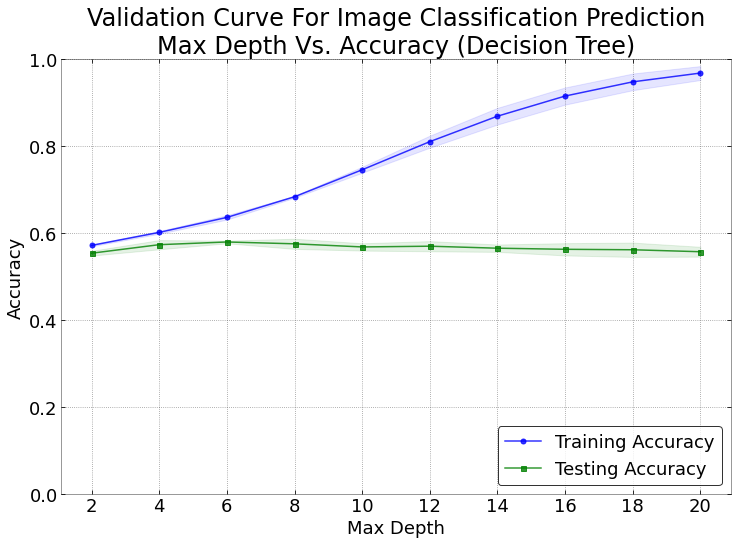

Fitting 5 folds for each of 2 candidates, totalling 10 fits


<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

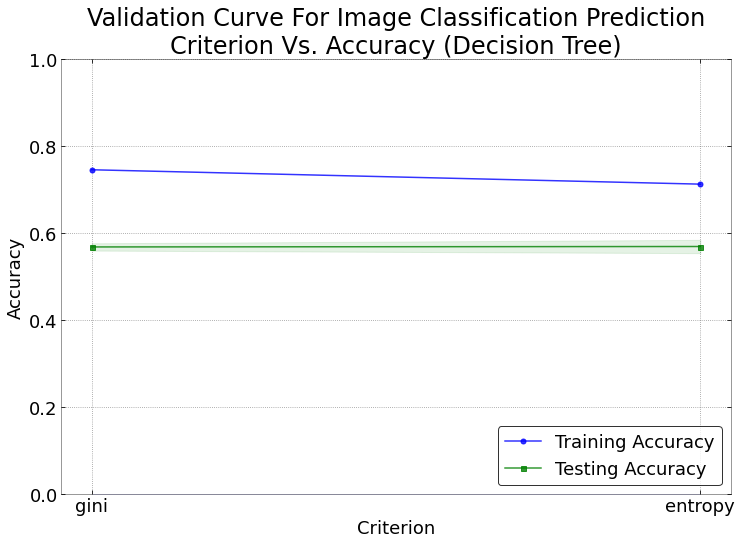

In [16]:
# Define the hyperparameter grid for max_depth
classifier = DecisionTreeClassifier(random_state=903949505)
param_grid = {
    'max_depth': np.array([2,4,6,8,10,12,14,16,18,20])
}
DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_max_depth', col2='Max Depth', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/DTree_ValidationCurve_MaxDepth.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/DTree_ValidationCurve_MaxDepth.jpg",title = "Validation Curve For Image Classification Prediction\nMax Depth Vs. Accuracy (Decision Tree)",form='{:,.0f}',
                                Change_name= False, custom_x_values=[2,4,6,8,10,12,14,16,18,20], new_labels = ['linear', 'rbf', 'poly', 'sigmoid'],
                               change_ylim = True, ylim_lower = 0.0, ylim_upper = 1, data_type_param = float)

param_grid = {
    'criterion' : ['gini', 'entropy']
}
classifier = DecisionTreeClassifier(random_state=903949505, max_depth=10)

DT_Grid_Min_Sample_Split = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_criterion', col2='Criterion', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/DTree_ValidationCurve_criterion.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/DTree_ValidationCurve_criterion.jpg",title = "Validation Curve For Image Classification Prediction\nCriterion Vs. Accuracy (Decision Tree)",form='{:.0f}',
                                Change_name= True, custom_x_values=['gini', 'entropy'], new_labels = ['gini', 'entropy'],
                               change_ylim = True, ylim_lower = 0.0, ylim_upper = 1, data_type_param = str)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

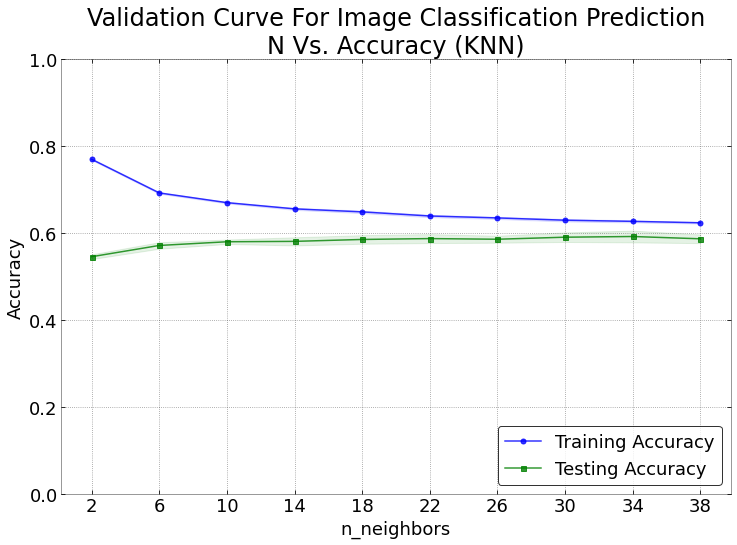

In [21]:
# Define the hyperparameter grid for max_depth
classifier = KNeighborsClassifier(n_neighbors=10)

param_grid = {
    'n_neighbors': [2, 6, 10, 14, 18, 22, 26, 30, 34, 38]
}

DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_n_neighbors', col2='n_neighbors', classifier=classifier,
                                excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/KNN_ValidationCurve_N.xlsx",
                                printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/KNN_ValidationCurve_N.jpg",title = "Validation Curve For Image Classification Prediction\nN Vs. Accuracy (KNN)",form='{:,.0f}',
                                Change_name= False, custom_x_values=[2, 6, 10, 14, 18, 22, 26, 30, 34, 38], new_labels = [2, 6, 10, 14, 18, 22, 26, 30, 34, 38],
                               change_ylim = True, ylim_lower = 0.0, ylim_upper = 1, data_type_param = float)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

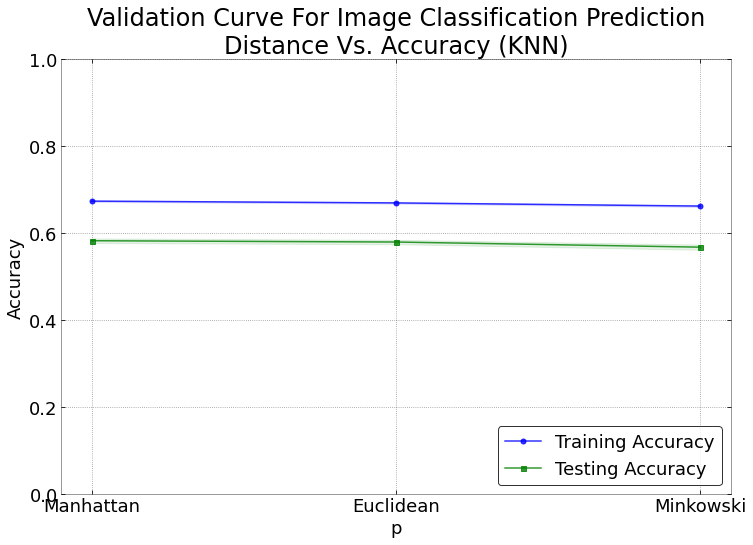

In [22]:
classifier = KNeighborsClassifier(n_neighbors=10)
param_grid = {
    'p': [1, 2, 3]
}
DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_p', col2='p', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/KNN_ValidationCurve_distance.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/KNN_ValidationCurve_distance.jpg",title = "Validation Curve For Image Classification Prediction\nDistance Vs. Accuracy (KNN)",form='{:,.0f}',
                                Change_name= True, custom_x_values=[1, 2, 3], new_labels = ['Manhattan','Euclidean','Minkowski'],
                               change_ylim = True, ylim_lower = 0.0, ylim_upper = 1, data_type_param = float)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

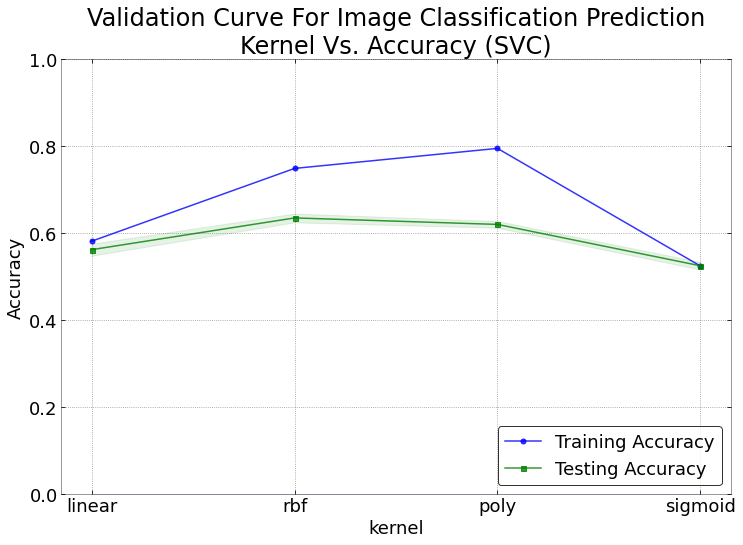

In [23]:
from sklearn.svm import SVC
classifier = SVC()
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']  # Different kernel types
}
DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_kernel', col2='kernel', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/SVC_ValidationCurve_kernel.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/SVC_ValidationCurve_kernel.jpg",title = "Validation Curve For Image Classification Prediction\nKernel Vs. Accuracy (SVC)",form='{:,.0f}',
                                Change_name= True, custom_x_values=['linear', 'rbf', 'poly', 'sigmoid'], new_labels = ['linear', 'rbf', 'poly', 'sigmoid'],
                               change_ylim = True, ylim_lower = 0.0, ylim_upper = 1, data_type_param = str)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

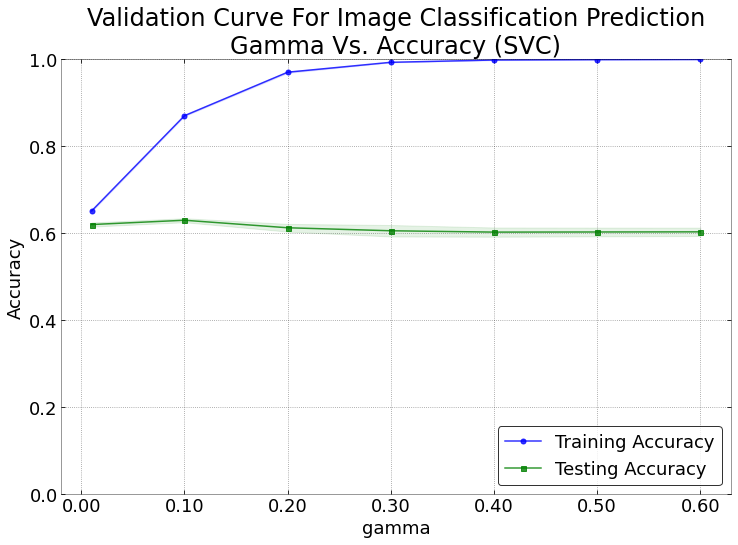

In [24]:
classifier = SVC(kernel='rbf', C = 100)
param_grid = {
    #'C': [0.1, 1, 10, 100]  # Different values for the regularization parameter C
    'gamma': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}
DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_gamma', col2='gamma', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/SVC_ValidationCurve_gamma.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/SVC_ValidationCurve_gamma.jpg",title = "Validation Curve For Image Classification Prediction\nGamma Vs. Accuracy (SVC)",form='{:,.2f}',
                                Change_name= False, custom_x_values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], new_labels = ['linear', 'rbf', 'poly', 'sigmoid'],
                               change_ylim = True, ylim_lower = 0.0, ylim_upper = 1, data_type_param = float)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[18:30:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:30:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

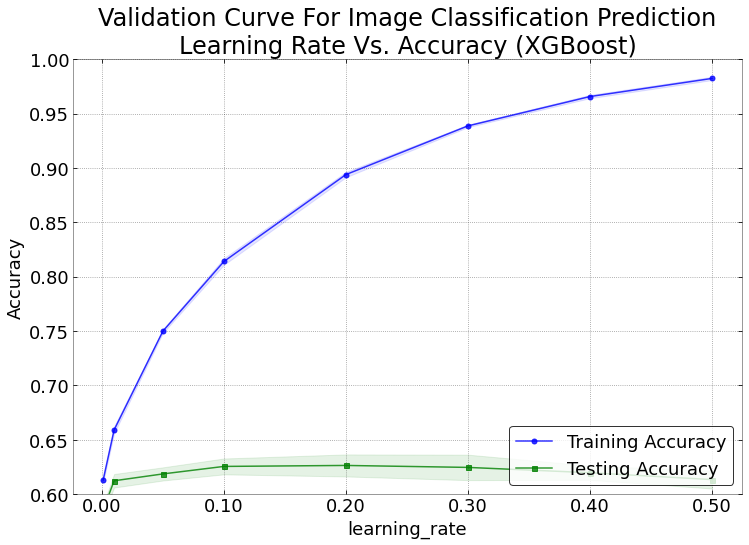

In [25]:
classifier = xgb.XGBClassifier(n_estimators=1000, nthread=-1, early_stopping_rounds = 50, max_depth=2)
param_grid = {
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.8, 1.0],
}
DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_learning_rate', col2='learning_rate', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/XGB_ValidationCurve_learning_rate.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/XGB_ValidationCurve_learning_rate.jpg",title = "Validation Curve For Image Classification Prediction\nLearning Rate Vs. Accuracy (XGBoost)",form='{:,.2f}',
                                Change_name= False, custom_x_values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5], new_labels = ['linear', 'rbf', 'poly', 'sigmoid'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1, data_type_param = float)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[18:44:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:44:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

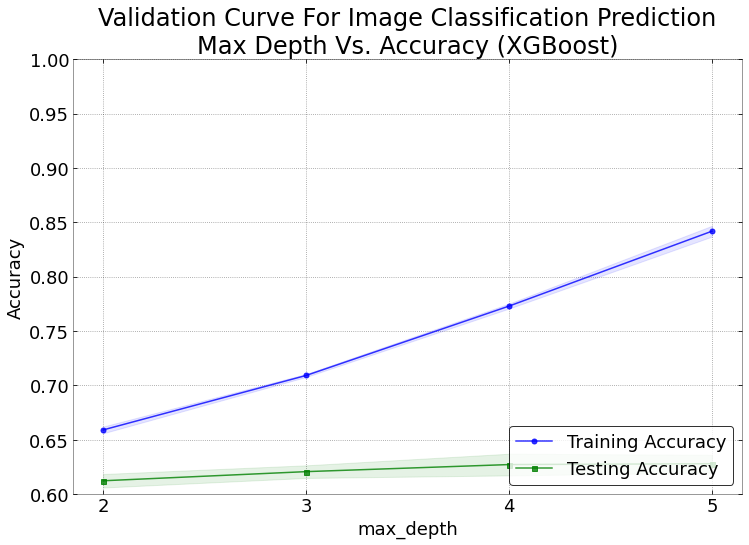

In [34]:
classifier = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.01, nthread=-1, early_stopping_rounds = 50)
param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 4, 5],
#     'subsample': [0.8, 1.0],
}
DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_max_depth', col2='max_depth', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/XGB_ValidationCurve_max_depth.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/XGB_ValidationCurve_max_depth.jpg",title = "Validation Curve For Image Classification Prediction\nMax Depth Vs. Accuracy (XGBoost)",form='{:,.0f}',
                                Change_name= False, custom_x_values=[2, 3, 4, 5], new_labels = ['linear', 'rbf', 'poly', 'sigmoid'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1, data_type_param = float)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sagni\anaconda3\envs\CS7641\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[18:32:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:32:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

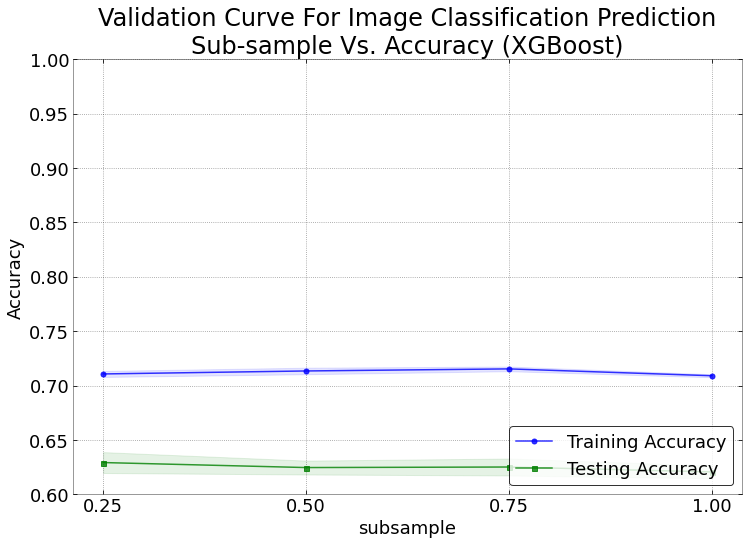

In [26]:
classifier = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.01, nthread=-1, early_stopping_rounds = 50, max_depth = 3)
param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
    'subsample': [0.25, 0.5, 0.75, 1.0],
}
DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_subsample', col2='subsample', classifier=classifier,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/XGB_ValidationCurve_subsample.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/XGB_ValidationCurve_subsample.jpg",title = "Validation Curve For Image Classification Prediction\nSub-sample Vs. Accuracy (XGBoost)",form='{:,.2f}',
                                Change_name= False, custom_x_values=[0.25, 0.5, 0.75, 1.0], new_labels = ['linear', 'rbf', 'poly', 'sigmoid'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1, data_type_param = float)

In [31]:
# List available GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        # Set a specific memory limit (e.g., 1GB) for the first GPU
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)]
        )

    except RuntimeError as e:
        print(e)

In [ ]:
# Define a function to create your TensorFlow model
def create_model(optimizer='adam', hidden_units=32, activation='relu'):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=trainX.shape[1], activation=activation))
    model.add(Dense(hidden_units, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap the Keras model as a scikit-learn estimator
model = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=16, verbose=2)

param_grid = {
    'optimizer': ['adam', 'sgd', 'RMSprop', 'Adagrad', 'Ftrl'],
#     'hidden_units': [8, 16, 32],
#     'activation': ['relu', 'tanh']
}

DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_optimizer', col2='optimizer', classifier=model,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/NN_ValidationCurve_optimizer.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/NN_ValidationCurve_optimizer.jpg",title = "Validation Curve For Image Classification Prediction\nChoice Of Optimizer Vs. Accuracy (NNet)",form='{:,.0f}',
                                Change_name= True, custom_x_values=['adam', 'sgd', 'RMSprop', 'Adagrad', 'Ftrl'], new_labels = ['adam', 'sgd', 'rms prop', 'adagrad', 'ftrl'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1, data_type_param = str)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
# Define a function to create your TensorFlow model
def create_model(optimizer='adam', hidden_units=4, activation='relu'):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=trainX.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap the Keras model as a scikit-learn estimator
model = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=128, verbose=0)

param_grid = {
#     'optimizer': ['adam', 'sgd'],
    'hidden_units': [8, 16, 32, 64, 96, 128, 160, 192, 224, 256],
#     'activation': ['relu', 'tanh']
}

DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_hidden_units', col2='hidden_units', classifier=model,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/NN_ValidationCurve_HiddenUnits.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/NN_ValidationCurve_HiddenUnits.jpg",title = "Validation Curve For Image Classification Prediction\nHidden Units Vs. Accuracy (NNet)",form='{:,.0f}',
                                Change_name= False, custom_x_values=[0, 32, 64, 96, 128, 160, 192, 224, 256], new_labels = ['linear', 'rbf', 'poly', 'sigmoid'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1, data_type_param = float)


In [ ]:
# Define a function to create your TensorFlow model
def create_model(activation, optimizer='adam', hidden_units=32):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=testX.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap the Keras model as a scikit-learn estimator
model = KerasClassifier(build_fn=create_model, epochs=10000, batch_size=128, verbose=0)

param_grid = {
#     'optimizer': ['adam', 'sgd'],
#    'hidden_units': [4, 8, 16, 20, 24, 28, 32],
     'activation': ['relu', 'tanh', 'sigmoid']
}

DT_Grid_Max_Depth = grid_search(trainX, testX, trainY, testY, param_grid, col1='param_activation', col2='activation', classifier=model,
                               excelpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/NN_ValidationCurve_ActivationFunc.xlsx",
                               printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/NN_ValidationCurve_ActivationFunc.jpg",title = "Validation Curve For Image Classification Prediction\nActivation Function Vs. Accuracy (NNet)",form='{:,.0f}',
                                Change_name= True, custom_x_values=['relu', 'tanh', 'sigmoid'], new_labels = ['relu', 'tanh', 'sigmoid'],
                               change_ylim = True, ylim_lower = 0.6, ylim_upper = 1, data_type_param = str)


In [ ]:
DTree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=903949505)
learning_curve_self(h1="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/LearningCurve_DecisionTree.jpg"
                        , X_train=trainX, y_train=trainY, classifier=DTree, title = "Learning Curve\nFor Image Classification (Decision Tree)", train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], cv=5
                    , ylim_lower = 0.6, ylim_upper = 1)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=10, p=2)
learning_curve_self(h1="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/LearningCurve_KNN.jpg"
                        , X_train=trainX, y_train=trainY, classifier=KNN, title = "Learning Curve\nFor Image Classification (KNN)", train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], cv=5
                    , ylim_lower = 0.6, ylim_upper = 1)

In [ ]:
SVM = SVC(kernel='rbf', C = 10, gamma = 0.02, random_state=903949505)
learning_curve_self(h1="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/LearningCurve_SVC.jpg"
                        , X_train=trainX, y_train=trainY, classifier=SVM, title = "Learning Curve\nFor Image Classification (SVM)", train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], cv=5
                    , ylim_lower = 0.6, ylim_upper = 1)

In [ ]:
XGBoost = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.01, nthread=-1, early_stopping_rounds = 50, max_depth = 3, subsample = 1, random_state=903949505)
learning_curve_self(h1="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/LearningCurve_XGBoost.jpg"
                        , X_train=trainX, y_train=trainY, classifier=XGBoost, title = "Learning Curve\nFor Image Classification (XGBoost)", train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], cv=5
                    , ylim_lower = 0.6, ylim_upper = 1)

In [ ]:
def create_model(activation='relu', optimizer='adam', hidden_units=32):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=testX.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

NNet = KerasClassifier(build_fn=create_model, epochs=10000, batch_size=128, verbose=0)

learning_curve_self(h1="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/LearningCurve_NNet.jpg"
                        , X_train=trainX, y_train=trainY, classifier=NNet, title = "Learning Curve\n For Image Classification (NNet)", train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], cv=5
                    , ylim_lower = 0.6, ylim_upper = 1)

In [ ]:
DTree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=903949505)

KNN = KNeighborsClassifier(n_neighbors=10, p=2)

SVM = SVC(kernel='rbf', C = 10, gamma = 0.02, random_state=903949505, probability=True)

XGBoost = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.01, nthread=-1, early_stopping_rounds = 50, max_depth = 3, subsample = 1, random_state=903949505)

def create_model(activation='relu', optimizer='adam', hidden_units=32):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=testX.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

NNet = KerasClassifier(build_fn=create_model, epochs=10000, batch_size=128, verbose=0)

models_dict = {
    'Decision Tree': DTree,
    'K Nearest Neighbors': KNN,
    'Support Vector Machine': SVM,
    'Boosted Tree': XGBoost,
    'Neural Network': NNet
}

results = evaluate_models(models_dict, trainX, trainY, testX, testY
                          , printpath="C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/Model_comparison.png")

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.2


In [ ]:
pd.DataFrame(results).to_excel("C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/Model_comparison.xlsx", index=True)

In [ ]:
gc.collect()
printpath1 = "C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/LearningCurve_NNet_Epoch.jpg"
printpath2 = "C:/Users/sagni/Documents/Personal Files/CS7641/CS7641/Data/Cat vs Dog/Images/LearningCurve_NNet_LossEpoch.jpg"
header = 24
other_title = 18
    
model = Sequential()
model.add(Dense(32, input_dim=testX.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(trainX, trainY, validation_split=0.33, epochs=1000, batch_size=32, verbose=0)

print(history.history.keys())
plt.clf()
plt.figure(figsize=(12, 8))
plt.gcf().set_facecolor('white')
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor('white')
ax.set_facecolor('white')
plt.plot(history.history['accuracy'], color='blue', label='Training Accuracy', alpha=0.8)
plt.plot(history.history['val_accuracy'], color='green', label='Testing Accuracy', alpha=0.8)
plt.xlabel('Epoch', fontsize=other_title)
plt.ylabel('Accuracy', fontsize=other_title)
plt.title('Learning Curve\nAccuracy vs. Epoch (NNet)', fontsize=header)
plt.legend(loc='lower right', frameon=True, edgecolor='black', facecolor='white', fontsize=other_title)
plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True, length=4)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
spine_alpha = 0.5
plt.gca().spines['top'].set_alpha(spine_alpha)
plt.gca().spines['bottom'].set_alpha(spine_alpha)
plt.gca().spines['left'].set_alpha(spine_alpha)
plt.gca().spines['right'].set_alpha(spine_alpha)
plt.grid(True, linestyle="dotted", alpha=0.45, color='black')
plt.xticks(fontsize=other_title)
plt.yticks(fontsize=other_title)
plt.ylim(0.6, 1.0)
plt.savefig(printpath1, dpi=600)
plt.show()
# summarize history for loss
plt.clf()
plt.figure(figsize=(12, 8))
plt.gcf().set_facecolor('white')
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor('white')
ax.set_facecolor('white')
plt.plot(history.history['loss'], color='blue', label='Training Accuracy', alpha=0.8)
plt.plot(history.history['val_loss'], color='green', label='Testing Accuracy', alpha=0.8)
plt.xlabel('Epoch', fontsize=other_title)
plt.ylabel('Accuracy', fontsize=other_title)
plt.title('Learning Curve For Image Classification\Loss vs. Epoch (NNet)', fontsize=header)
plt.legend(loc='lower right', frameon=True, edgecolor='black', facecolor='white', fontsize=other_title)
plt.tick_params(direction='in', bottom=True, top=True, left=True, right=True, length=4)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
spine_alpha = 0.5
plt.gca().spines['top'].set_alpha(spine_alpha)
plt.gca().spines['bottom'].set_alpha(spine_alpha)
plt.gca().spines['left'].set_alpha(spine_alpha)
plt.gca().spines['right'].set_alpha(spine_alpha)
plt.grid(True, linestyle="dotted", alpha=0.45, color='black')
plt.xticks(fontsize=other_title)
plt.yticks(fontsize=other_title)
plt.ylim(0.6, 1.0)
plt.savefig(printpath2, dpi=600)
plt.show()